<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/DATA-ANALYSIS/blob/main/Data_Analysis_EDA_and_Pickle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
d = pd.read_csv("/content/dataset-2.csv")
d.head()

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
d

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1030 non-null   float64
 1   x2      1030 non-null   float64
 2   x3      1030 non-null   float64
 3   x4      1030 non-null   float64
 4   x5      1030 non-null   float64
 5   x6      1030 non-null   float64
 6   x7      1030 non-null   float64
 7   x8      1030 non-null   int64  
 8   target  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
d.isnull().sum()

,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
x7,0
x8,0
target,0


In [6]:
d.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
d.duplicated().sum()

np.int64(25)

In [8]:
d.drop_duplicates(inplace = True)

In [9]:
d

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [10]:
x = d.drop('target' , axis = 1)
y = d['target']

In [11]:
x.shape , y.shape

((1005, 8), (1005,))

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [13]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((804, 8), (201, 8), (804,), (201,))

In [14]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [15]:
x_train_sc.shape , x_test_sc.shape

((804, 8), (201, 8))

In [16]:
model = LinearRegression()
model.fit(x_train_sc, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test_sc)
y_pred

array([23.46019162, 16.70304272, 22.45208992, 37.39624296, 42.88500822,
       22.1568172 , 14.60542252, 44.51712266, 33.29461637, 50.12870223,
       33.51852158, 29.09223858, 44.91076599, 50.72620597, 28.86931792,
       21.311598  , 32.82122051, 43.41014104, 37.38518333, 51.63672218,
       32.80717289, 14.33028425, 30.55628737, 29.75180646, 13.4061833 ,
       34.73404267, 46.86386689, 33.72787301, 30.55371311, 48.90588245,
       39.89833926, 46.24605265, 61.76724866, 38.01549768, 25.32709169,
       66.30266888, 37.83663606, 35.47400535, 35.97435845, 69.09500324,
       34.15320713, 28.83020125, 37.39873716, 39.45118386, 44.77210135,
       44.6110985 , 50.74480657, 23.68221608, 53.83507265, 32.79126741,
       32.29141421, 46.75815738, 29.24984248, 23.64573713, 21.31820652,
       31.47937995, 50.43614235, 21.89335165, 41.03445703, 58.25920648,
       31.11208627, 30.23521262, 29.7281413 , 30.75599676, 52.13640713,
       55.1197504 , 33.12653131, 31.70719496, 49.92244243, 58.70

In [18]:
mean_squared_error(y_test , y_pred)

125.2456480505019

In [19]:
r2_score(y_test , y_pred)

0.5801703029028777

# Concrete Strength Prediction

This project implements and compares Linear Regression and Random Forest Regressor models to predict a target variable based on multiple features from a provided dataset.

## Project Overview
The project follows a standard machine learning pipeline:
1.  **Data Loading**: Importing the dataset using Pandas.
2.  **Exploratory Data Analysis (EDA)**: Checking data info, null values, and summary statistics.
3.  **Data Cleaning**: Removing duplicate records.
4.  **Preprocessing**: Splitting the data into training and testing sets and performing feature scaling using `StandardScaler`.
5.  **Model Training**: Training a Linear Regression model and a Random Forest Regressor.
6.  **Evaluation**: Measuring performance using Mean Squared Error (MSE), R2 Score, and Mean Absolute Error (MAE).
7.  **Visualization**: Creating scatter plots to compare actual vs. predicted values.
8.  **Model Persistence**: Saving the trained models and scalers using `pickle` for deployment.

## Dataset
The dataset (`dataset-2.csv`) contains 9 columns:
*   **Features (x1 to x8)**: Numeric inputs representing different components or parameters.
*   **Target**: The numeric value to be predicted (e.g., Concrete Compressive Strength).

## Results

| Model | MSE | R2 Score | MAE |
| :--- | :--- | :--- | :--- |
| **Linear Regression** | ~125.25 | ~0.58 | ~8.90 |
| **Random Forest** | ~27.06 | ~0.91 | ~3.58 |

*Random Forest significantly outperformed Linear Regression in this task.*

## How to Use

### Prerequisites
*   Python 3.x
*   Libraries: `numpy`, `pandas`, `matplotlib`, `scikit-learn`

### Running the Code
1.  Ensure `dataset-2.csv` is in the same directory.
2.  Run the notebook cells sequentially.
3.  The models will be saved as `linear_regression_model.pkl` and `random_forest_model.pkl`.

### Loading the Model
```python
import pickle
with open('random_forest_model.pkl', 'rb') as f:
    data = pickle.load(f)
model = data['model']
scaler = data['scaler']
```

## Visualizations
The project includes side-by-side scatter plots comparing the prediction accuracy of both models.

In [20]:
mean_absolute_error(y_test , y_pred)

8.89525622146419

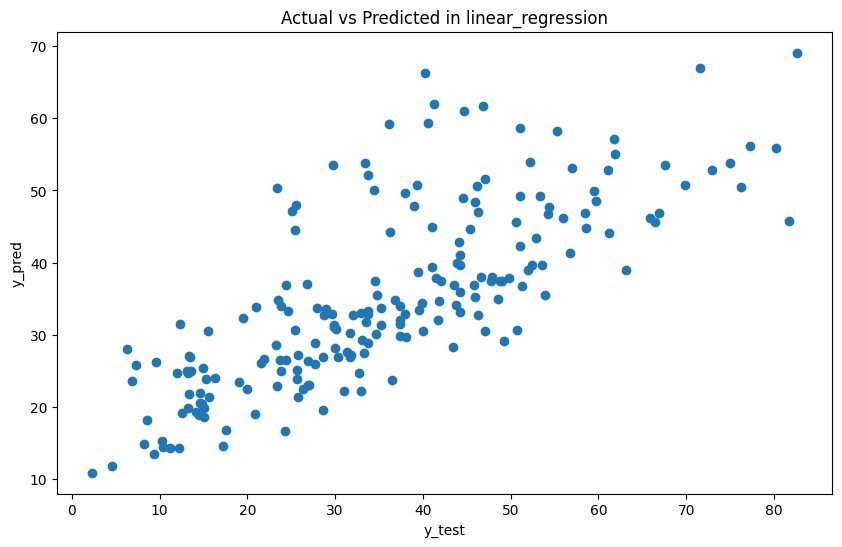

In [21]:
plt.figure(figsize = (10,6))
plt.scatter(y_test , y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted in linear_regression")
plt.show()

In [22]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train_sc , y_train)

RandomForestRegressor()

In [23]:
y_pred_rf = model_rf.predict(x_test_sc)
y_pred_rf

array([21.8422    , 27.2899    , 23.469     , 35.76902857, 48.9334    ,
       32.0996    , 23.515     , 22.3553    , 33.8561    , 31.0139    ,
       29.7242    , 28.8212    , 40.3957    , 43.48517857, 34.4632    ,
       15.8749    , 38.1121    , 48.4043    , 49.7299    , 42.27596   ,
       34.7867    , 12.0107    , 45.5853    , 33.2614    , 10.1177    ,
       35.808     , 67.1616    , 34.7763    , 14.5989    , 47.0727    ,
       41.9012    , 56.7057    , 48.967575  , 43.2025    , 15.2234    ,
       39.6873    , 46.7365    , 48.365     , 41.9741    , 76.286     ,
       38.4467    , 25.22174   , 35.78293333, 43.8433    , 54.9451    ,
       49.6679    , 68.7135    , 32.0093    , 58.9751    , 41.947     ,
       18.5947    , 49.0607    , 40.9979    , 11.9742    , 27.8786    ,
       40.5241    , 57.2762    , 10.749     , 37.903     , 52.4471    ,
       31.9488    , 36.1521    , 40.7518    , 31.0761    , 41.8775    ,
       57.3026    , 39.5891    , 37.2595    , 60.63126333, 53.33

In [24]:
mean_squared_error(y_test , y_pred_rf)

27.060890434085685

In [25]:
r2_score(y_test , y_pred_rf)

0.9092905373483348

In [26]:
mean_absolute_error(y_test , y_pred_rf)

3.578752829898128

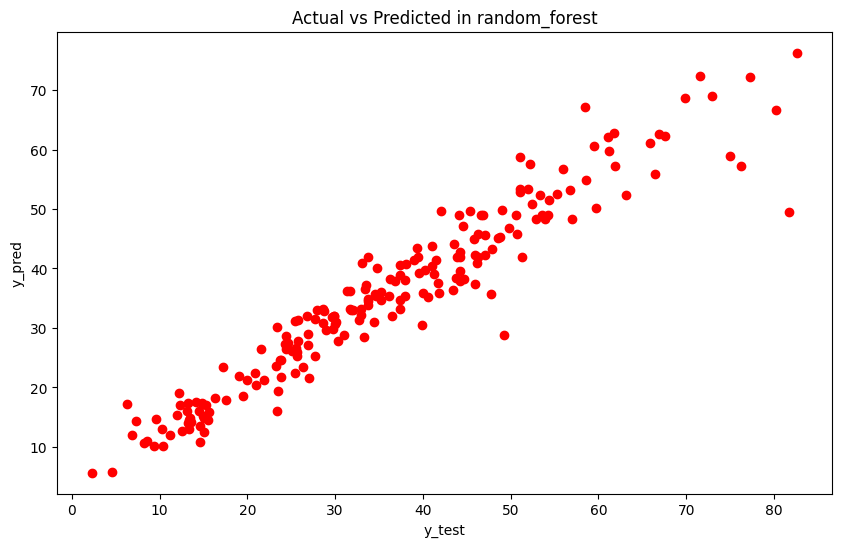

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(y_test , y_pred_rf , c = 'r' )
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted in random_forest")
plt.show()

Linear regression vs random_forest


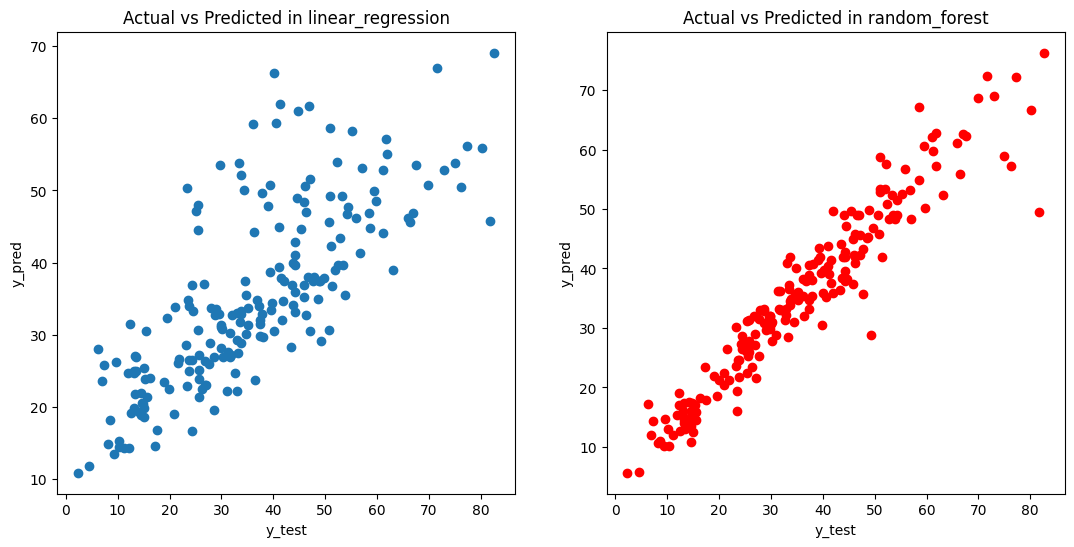

In [28]:
# 2 models in side by side plot
print("Linear regression vs random_forest")
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
plt.scatter(y_test , y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted in linear_regression")

plt.subplot(1,2,2)
plt.scatter(y_test , y_pred_rf , c = 'r' )
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted in random_forest")
plt.show()

In [29]:
import pickle

lr_model_data = {
    'model': model, 'scaler': sc
}

# Save to a pickle file
file_path = 'linear_regression_model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(lr_model_data, f)

print(f"Model and scaler successfully saved to {file_path}")

Model and scaler successfully saved to linear_regression_model.pkl


In [30]:
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

print("Model and scaler loaded successfully.")

Model and scaler loaded successfully.


In [31]:
import pickle

rf_model_data = {
    'model': model_rf, 'scaler': sc
}

# Save to a pickle file
file_path = 'random_forest_model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(rf_model_data, f)

print(f"Model and scaler successfully saved to {file_path}")

Model and scaler successfully saved to random_forest_model.pkl


In [32]:
with open('random_forest_model.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

print("Model and scaler loaded successfully.")

Model and scaler loaded successfully.


In [45]:
from google.colab import files
files.download("random_forest_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
from google.colab import files
files.download("linear_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>